In [98]:
from tensorflow import keras
keras.__version__

'2.7.0'

In [99]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [100]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

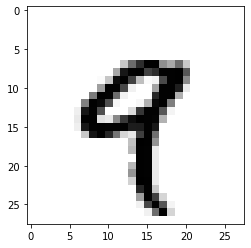

In [101]:
import matplotlib.pyplot as plt
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [102]:
train_images.shape

(60000, 28, 28)

In [103]:
train_labels[4]

9

In [104]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax')) #분류모델은 'sigmoid' 멀티클래스 'softmax' #회귀모델인 경우 'linear'

In [105]:
# 모델 형성시 필요한 조건
# 1. 가운데 정보가 가장 많아야 한다(사진같이)
# 2. 이미지는 공간적으로  픽셀같에 커릴레이션?(연관성?) 정보를 유지할 수 있어야한다.
# 3. 각각의 채널의 방향은 독립이다.
# 4. 이미지는 이미지자체의 배열정보도 같이 저장해야한다.
# 5. 딥러닝 모델은 모든 layer를 학습할 필요 없다 개개소 layer만 재학습돌려도 잘 작동

In [106]:
785*512

401920

In [107]:
network.summary() # 모든 학습파라메타 407050, 학습가능 407050 학습 불가능 0

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [108]:
ly0=network.layers[0]
ly0.weights
w1 = ly0.weights[0]
b1 = ly0.weights[1]

w1.shape, b1.shape #입력사이즈 512, 출력사이즈 10

(TensorShape([784, 512]), TensorShape([512]))

In [109]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [110]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [111]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [112]:
train_labels.shape

(60000, 10)

In [113]:
hist = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2549 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9887


In [114]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.9755


In [115]:
print('test_acc:', test_acc)

test_acc: 0.9754999876022339


In [116]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

In [117]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, 
random_state=2022, test_size=0.3)

In [119]:
X_train.shape

(105, 4)

In [120]:
import tensorflow as tf
from tensorflow.keras import models
model = models.Sequential()
model.add(tf.keras.layers.Dense(units=6, input_dim = X_train.shape[1], 
activation='tanh'))


In [121]:
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [122]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 30        
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [123]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)


In [124]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy')

In [125]:
label_tr = tf.keras.utils.to_categorical(y_train)

In [131]:
history = model.fit(X_train, label_tr, batch_size=16, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 1ms/step - loss: 0.1014
Epoch 2/20
7/7 [==============================] - 0s 1ms/step - loss: 0.1031
Epoch 3/20
7/7 [==============================] - 0s 997us/step - loss: 0.0923
Epoch 4/20
7/7 [==============================] - 0s 1ms/step - loss: 0.0944
Epoch 5/20
7/7 [==============================] - 0s 997us/step - loss: 0.1035
Epoch 6/20
7/7 [==============================] - 0s 1ms/step - loss: 0.0819
Epoch 7/20
7/7 [==============================] - 0s 1ms/step - loss: 0.1062
Epoch 8/20
7/7 [==============================] - 0s 997us/step - loss: 0.0905
Epoch 9/20
7/7 [==============================] - 0s 1ms/step - loss: 0.0825
Epoch 10/20
7/7 [==============================] - 0s 998us/step - loss: 0.0940
Epoch 11/20
7/7 [==============================] - 0s 1ms/step - loss: 0.0918
Epoch 12/20
7/7 [==============================] - 0s 997us/step - loss: 0.0937
Epoch 13/20
7/7 [==============================] - 0s 1ms/step 

In [134]:
y_test = to_categorical(y_test)
model.evaluate(X_test, y_test)


2/2 [==============================] - 0s 2ms/step - loss: 0.1489


0.1489148586988449

In [135]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [137]:
X_train.shape[1]

(379, 13)

In [141]:
from tensorflow.keras import Sequential
import tensorflow.keras.layers as lp
net = Sequential()
net.add(tensorflow.keras.layers.Dense(25, activation='relu', input_dim =X_train.shape[1]))

In [143]:
net.add(lp.Dense(6, activation='relu'))
net.add(lp.Dense(2,activation='linear'))

In [144]:
net.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 25)                350       
                                                                 
 dense_14 (Dense)            (None, 6)                 156       
                                                                 
 dense_15 (Dense)            (None, 6)                 42        
                                                                 
 dense_16 (Dense)            (None, 2)                 14        
                                                                 
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [145]:
def mse(y, p):
    return np.square(y - p).mean()

def mae(y, p):
    return np.abs(y - p).mean()

In [149]:
net.compile('adam','mse', ['mae'])
hist = net.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
24/24 [==============================] - 0s 5ms/step - loss: 229.6337 - mae: 12.2196 - val_loss: 93.5148 - val_mae: 7.3233
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 79.6495 - mae: 6.1504 - val_loss: 68.9785 - val_mae: 6.1194
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 66.1867 - mae: 5.9388 - val_loss: 69.7395 - val_mae: 5.7457
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 63.2552 - mae: 5.7083 - val_loss: 66.1542 - val_mae: 5.5656
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 61.1098 - mae: 5.5195 - val_loss: 63.6074 - val_mae: 5.4319
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 58.8296 - mae: 5.4632 - val_loss: 62.8498 - val_mae: 5.3722
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 57.4875 - mae: 5.4051 - val_loss: 59.1932 - val_mae: 5.4136
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 55

In [150]:
net.evaluate(X_test, y_test)

4/4 [==============================] - 0s 997us/step - loss: 32.4376 - mae: 4.0528


[32.43758773803711, 4.052781105041504]